## Intervalo de confiança e Testes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importando as bibliotecas
import pandas as pd
from zipfile import ZipFile
import numpy as np

#Lendo a base de dados
caminho = "/content/drive/MyDrive/Bootcamp Alura/Módulo 03/Arquivos/dados/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
#Calculando o IMC
#É necessário converter a altura de cm para m
dados["IMC"] = dados["VB17003"] / ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [ ]:
#Criando as classes do IMC

'''
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

Bin values into discrete intervals.
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable 
For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins

include_lowestbool, default False
Whether the first interval should be left-inclusive or not
'''

classes = [0, 18.5, 25, 30, 60]
labels = ["Abaixo do peso", "Peso normal", "Sobrepeso", "Obesidade"]

dados["CLASSE_IMC"] = pd.cut(x = dados["IMC"], bins = classes, labels = labels, include_lowest = True)

In [ ]:
#Calculando o intervalo de confiança da altura
from statsmodels.stats.weightstats import zconfint

zconfint(dados["VB17004"].to_list())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(160.5556082427712, 160.87061789880892)

In [ ]:
#Calculando o intervalo de confiança
from statsmodels.stats.weightstats import DescrStatsW

'''
DescrStatsW.tconfint_mean(alpha=0.05, alternative='two-sided')
Two-sided confidence interval for weighted mean of data
If the data is 2d, then these are separate confidence intervals for each column

Returns: lower and upper bound of confidence interval
'''

descricao_altura = DescrStatsW(dados["VB17004"])
descricao_altura.tconfint_mean()

(160.55559672649298, 160.8706294150872)

### Desafio 1: Ler e pesquisar sobre intervalo de confiança, nível de confiança e significância

>Intervalo de confiança </font>

O **intervalo de confiança** propõe uma gama de valores plausíveis para um parâmetro desconhecido. O **intervalo de confiança** possui um nível de confiança associado. O nível de confiança padrão é 95%. 

>Nível de confiança </font>

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal.

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. 

>Nível de significância </font>

De forma complementar, o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

### Desafio 2: Plotar o intervalo de confiança no histograma das alturas

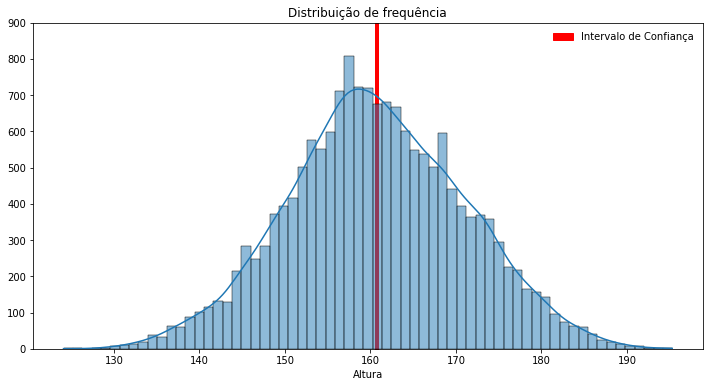

In [ ]:
#Plotando o histograma - Altura
import seaborn as sns

##Calculando o intervalo de confiança da altura
ic = zconfint(dados["VB17004"])

ax = sns.histplot(x = "VB17004", data = dados, kde = True) 
ax.fill_betweenx(y=[0, 900], x1=ic[0], x2=ic[1], color="r", label="Intervalo de Confiança") 
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax.set_ylabel("")
ax.set_ylim((0,900))

#Adicionando a legenda
ax.legend(frameon=False)

ax;

### Continuando a aula...

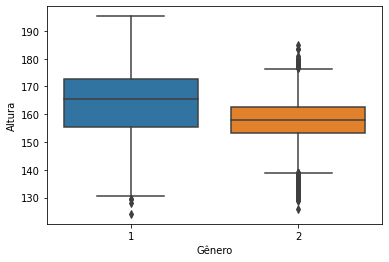

In [ ]:
#Plotando o boxplot relacionando a altura e o gênero
ax = sns.boxplot(x = "VB01001", y = "VB17004", data = dados);
ax.set_ylabel("Altura")
ax.set_xlabel("Gênero")
ax;

In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.
- A p-value is a measure of the probability that an observed difference could have occurred just by random chance.
- The lower the p-value, the greater the statistical significance of the observed difference.
- P-value can be used as an alternative to or in a addition to pre-selected confidence levels for hypothesis testing.

The level of statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

- A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.
<br>However, this does not mean that there is a 95% probability that the research hypothesis is true. The p-value is conditional upon the null hypothesis being true is unrelated to the truth or falsity of the research hypothesis.

- A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. You should note that you cannot accept the null hypothesis, we can only reject the null or fail to reject it.
<br>A statistically significant result cannot prove that a research hypothesis is correct (as this implies 100% certainty).

Instead, we may state our results “provide support for” or “give evidence for” our research hypothesis (as there is still a slight probability that the results occurred by chance and the null hypothesis was correct – e.g. less than 5%).

In [ ]:
#Fazendo o teste Z
from statsmodels.stats.weightstats import ztest

'''
statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
Test for mean based on normal distribution, one or two samples
In the case of two samples, the samples are assumed to be independent

Returns: test statistic, pvalue of the t-test
'''

distribuicao_altura_m = dados.query("VB01001 == 1")["VB17004"]
distribuicao_altura_f = dados.query("VB01001 == 2")["VB17004"]

_ , p_value = ztest(distribuicao_altura_m, distribuicao_altura_f)
p_value

0.0

In [ ]:
#Fazendo o teste de normalidade
from scipy.stats import normaltest

'''
scipy.stats.normaltest(a, axis=0, nan_policy='propagate')
Test whether a sample differs from a normal distribution
This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s, 
test that combines skew and kurtosis to produce an omnibus test of normality

Returns: s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest, 
a 2-sided chi squared probability for the hypothesis test
'''

_, p_value_normaltest_m = normaltest(distribuicao_altura_m)
_, p_value_normaltest_f = normaltest(distribuicao_altura_f)
print(p_value_normaltest_m)
print(p_value_normaltest_f)

7.695118853996524e-75
7.125189471020874e-47


In [ ]:
#Fazendo o rank-sum test
from scipy.stats import ranksums

'''
scipy.stats.ranksums(x, y)
Compute the Wilcoxon rank-sum statistic for two samples
The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution 
The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample
This test should be used to compare two samples from continuous distributions 
It does not handle ties between measurements in x and y. For tie-handling and an optional continuity correction see scipy.stats.mannwhitneyu

Returns: the test statistic under the large-sample approximation that the rank sum statistic is normally distributed, 
the two-sided p-value of the test.
'''

ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

### Funções

In [ ]:
#Lendo os dados do Dicionário PeNSE
dicionario = pd.read_excel("/content/drive/MyDrive/Bootcamp Alura/Módulo 03/Arquivos/dados/Dicionario_PENSE_Microdados_AMOSTRA2.xls")

In [ ]:
#Criando a função para criar um dicionário com as respostas
def cria_dicionario_respostas(cod_pergunta: str, dicionario = dicionario):
  '''
  Esta função cria um dicionário com as respostas a partir do código da pergunta

  Parâmetros: 
    cod_pergunta: string com o código da pergunta
    dicionario: DataFrame com os dados do arquivo "Dicionario_PENSE_Microdados_AMOSTRA2.xls"
  
  Retorna:
    pergunta: string com o texto da pergunta
    dicionario_respostas: dicionário contendo as respostas possíveis
  '''

  #Fazendo a query
  busca = dicionario.query(f"VARIÁVEL == '{cod_pergunta}'")

  #Selecionando o índice da pergunta 
  indice_pergunta = (busca.index).tolist()[0]

  #Guardando o texto da pergunta
  #df.iloc[<linhas>, <colunas>]
  pergunta = dicionario.iloc[indice_pergunta, 1]

  #Criando um dicionário para as respostas possíveis
  dicionario_respostas = {}

  #Enquanto não encontro o código da próxima pergunta
  indice = indice_pergunta + 1

  while True:

    valor = dicionario.loc[indice]["VARIÁVEL"]

    #Para corrigir a ocorrência de "0 a 2999"
    if type(valor) is int or valor.replace(" a ", "").isnumeric():

      #Adicionando as variáveis e as alternativas de resposta ao dicionário
      nova_linha = {int(valor) : dicionario.iloc[indice]["QUESTIONÁRIO DO ALUNO"]}

      #Atualizando o dicionário com a nova linha
      dicionario_respostas.update(nova_linha)

      indice += 1
    
    else:
      break
  
  return pergunta, dicionario_respostas

In [ ]:
#Criando uma função para plotar o histograma e o desvio padrão, a média, a moda e a mediana 
def cria_histograma(cod_pergunta: str, pergunta: str, dados = dados):

  '''
  Esta função cria um histograma a partir do código da pergunta, além disso plota o desvio padrão, a média, 
  a moda e a mediana
  
  Parâmetros:
    cod_pergunta: string com o código da pergunta
    dados: DataFrame com os dados do arquivo "PENSE_AMOSTRA2_ALUNO.CSV"
    pergunta: string com a pergunta
 '''

  #Calculando o desvio padrão, a média, a moda e a mediana 
  media = dados[cod_pergunta].mean()
  moda = dados[cod_pergunta].mode()[0]
  mediana = dados[cod_pergunta].median()
  desvio_padrao = dados[cod_pergunta].std()
  desvio_padrao_inferior = media - desvio_padrao
  desvio_padrao_superior = media + desvio_padrao

  #Plotando o histograma
  ax = sns.histplot(x = cod_pergunta, data = dados, kde = True)
  ax.figure.set_size_inches(12,6)
  ax.set_title("Distribuição de frequência", fontsize=16)
  ax.set_xlabel(f"{pergunta}", fontsize=12)
  ax.set_ylabel("")
  #sns.despine()

  #Plotando as linhas calculadas anteriormente
  ax.axvspan(desvio_padrao_inferior, desvio_padrao_superior, color="b", alpha=0.15, label="Desvio padrão")
  ax.axvline(media, color = "r", linestyle="-", label="Média")
  ax.axvline(moda, color = "g", linestyle="-", label="Moda")
  ax.axvline(mediana, color="gold", linestyle="-", label="Mediana") 

  #Adicionando a legenda
  ax.legend()

  ax;

In [ ]:
#Criando uma função para plotar o histograma comparando duas variáveis
def compara_histograma(cod_pergunta: str, pergunta: str, compara: str, dados = dados):

  '''
  Esta função cria um histograma a partir do código da pergunta, além disso plota o desvio padrão, a média, 
  a moda e a mediana
  
  Parâmetros:
    cod_pergunta: string com o código da pergunta
    dados: DataFrame com os dados do arquivo "PENSE_AMOSTRA2_ALUNO.CSV"
    pergunta: string com a pergunta
    compara: string com a variável a ser comparada
 '''

  #Plotando o histograma
  ax = sns.histplot(x = cod_pergunta, data = dados, kde = True, hue = compara)
  ax.figure.set_size_inches(12,6)
  ax.set_title("Distribuição de frequência", fontsize=16)
  ax.set_xlabel(f"{pergunta}", fontsize=12)
  ax.set_ylabel("")

  ax;

In [ ]:
#Função para arredondar os valores de uma tupla
def arredonda_tupla(tupla):
  return tuple([round(x,2) if isinstance(x, float) else x for x in tupla])

### Desafio 3: Realizar os testes de hipóteses de outras informações, explorando e enriquecendo a análise dos dados

**Seguindo com a análise realizada na Aula 3 do Módulo 3:**



Objetivo: observar algum indício de transtorno dismórfico corporal (TDC), que se caracteriza pela percepção alterada de si mesmo diante do espelho: quando o que a pessoa enxerga no espelho não condiz com a realidade.

https://www.cellerafarma.com.br/bem-estar/disturbio-de-imagem-entenda-o-que-e

**Índice de Massa Corporal**

In [ ]:
#Calculando a média 
media_imc = round(dados["IMC"].groupby(dados["VB01001"]).mean(), 2)

#Calculando o desvio padrão 
desvio_padrao_imc = round(dados["IMC"].groupby(dados["VB01001"]).std(), 2)

#Calculando a variância amostral 
variancia_imc = round(dados["IMC"].groupby(dados["VB01001"]).var(), 2)

#Exibindo as três variáveis em uma tabela
tabela_imc = pd.concat([media_imc, desvio_padrao_imc, variancia_imc], axis=1, keys=["Média", "Desvio Padrão", "Variância"])
tabela_imc = tabela_imc.rename_axis("Sexo", axis="index")
tabela_imc = tabela_imc.rename({1: "Masculino", 2: "Feminino"}, axis="index")
tabela_imc = tabela_imc.rename_axis("IMC", axis="columns")
tabela_imc

IMC,Média,Desvio Padrão,Variância
Sexo,,,
Masculino,20.82,4.28,18.28
Feminino,21.09,4.21,17.72


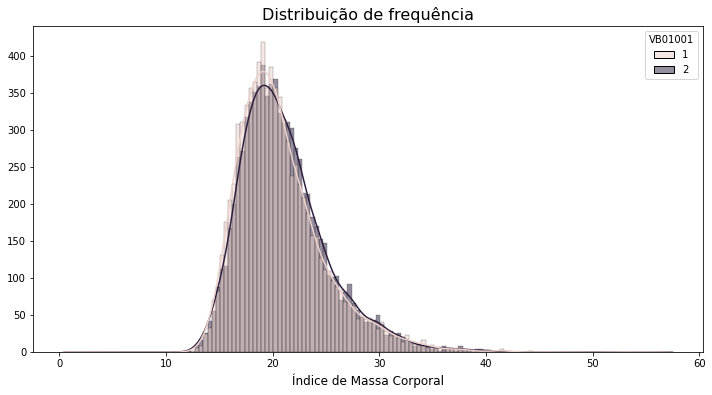

In [ ]:
#Plotando o histograma relacionando o IMC e o sexo
compara_histograma("IMC", "Índice de Massa Corporal", "VB01001")

In [ ]:
#Calculando o intervalo de confiança do IMC
arredonda_tupla(zconfint(dados["IMC"].to_list()))

(20.89, 21.02)

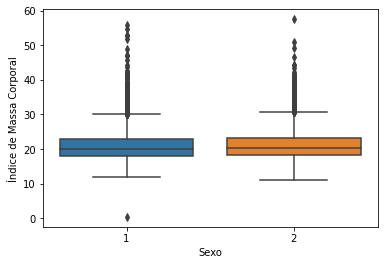

In [ ]:
#Plotando o boxplot relacionando o IMC e o sexo
ax = sns.boxplot(x = "VB01001", y = "IMC", data = dados);
ax.set_ylabel("Índice de Massa Corporal")
ax.set_xlabel("Sexo")
ax;

In [ ]:
#Definindo as variáveis
distribuicao_imc_m = dados.query("VB01001 == 1")["IMC"]
distribuicao_imc_f = dados.query("VB01001 == 2")["IMC"]

**Normal test**
<br>Hipótese nula: a amostra vem de uma distribuição normal

In [ ]:
#Fazendo o teste de normalidade

_, p_value_normaltest_m = normaltest(distribuicao_imc_m)
_, p_value_normaltest_f = normaltest(distribuicao_imc_f)

print(p_value_normaltest_m)
print(p_value_normaltest_f)

0.0
0.0


Sendo p-value menor que 0.05, a hipótese nula é rejeitada: as curvas não configuram uma distribuição normal.
O teste Z não cabe nesse caso.

**Rank-sum test**
<br>Hipótese nula: as duas distribuições são provenientes da mesma distribuição

In [ ]:
#Fazendo o rank-sum test
_, p_value = ranksums(distribuicao_imc_m, distribuicao_imc_f)

#Testando a hipótese
p_value < 0.05

True

Sendo p-value menor que 0.05, a hipótese nula é rejeitada: as distribuições são provenientes de distribuições diferentes.

**VB11007: Como você se sente em relação ao seu corpo?**

In [ ]:
cria_dicionario_respostas("VB11007")

({1: 'Muito satisfeito(a)',
  2: 'Satisfeito(a)',
  3: 'Indiferente',
  4: 'Insatisfeito(a)',
  5: 'Muito insatisfeito(a)',
  99: 'Não informado'},
 'Como você se sente em relação ao seu corpo?')

In [ ]:
#Calculando a frequência cruzando o sexo e a pergunta "VB11007: Como você se sente em relação ao seu corpo?"

#Criando os dicionários
respostas_indices = cria_dicionario_respostas("VB11007")[0]
pergunta_indices = cria_dicionario_respostas("VB11007")[1]

frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "columns", colnames=["Sexo"], rownames=[pergunta_indices]) * 100
frequencia_cruzada.rename(index = respostas_indices, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada.round(2)

Sexo,Masculino,Feminino
Como você se sente em relação ao seu corpo?,,
Muito satisfeito(a),32.36,23.29
Satisfeito(a),42.11,41.48
Indiferente,11.46,10.36
Insatisfeito(a),9.48,18.62
Muito insatisfeito(a),3.14,5.49
Não informado,1.44,0.75


Ao normalizar pelas colunas, é possível observar uma maior proporção de estudantes do sexo feminino que se disseram insatisfeitas ou muito insatisfeitas em relação ao corpo.

|  | Masculino | Feminino | 
|-|:-:|:-:|
| **Insatisfeito(a)** | 9.48% | 18.62% | 
| **Muito insatisfeito(a)** | 3.14% | 5.49% |

O inverso também é observado quando se trata de satisfação: houve uma maior proporção de estudantes do sexo masculino que se disseram muito satisfeitos em relação ao corpo.

|  | Masculino | Feminino | 
|-|:-:|:-:|
| **Muito satisfeito(a)** | 32.36% | 23.29% | 

In [ ]:
#Calculando a frequência cruzando o Sexo e a pergunta "VB11007: Como você se sente em relação ao seu corpo?" 
#Agregando pela contagem de estudantes insatisfeitos ou muito insatisfeitos em relação ao corpo

#Criando os dicionários
respostas_colunas = cria_dicionario_respostas("VB01001")[0]
pergunta_colunas = cria_dicionario_respostas("VB01001")[1]

frequencia_cruzada = pd.crosstab(dados["CLASSE_IMC"], dados["VB01001"], values=dados.query("VB11007 == 4 or VB11007 == 5")["VB11007"], 
                                 aggfunc="count", normalize="columns") * 100
frequencia_cruzada.rename(columns = respostas_colunas, inplace = True)
frequencia_cruzada.rename_axis("Classificação do IMC:", axis=0, inplace = True)
frequencia_cruzada.rename_axis(pergunta_colunas, axis=1, inplace = True)
frequencia_cruzada.round(2)

Qual é o seu sexo?,Masculino,Feminino
Classificação do IMC:,,
Abaixo do peso,22.28,19.51
Peso normal,47.80,51.40
Sobrepeso,19.41,20.36
Obesidade,10.52,8.73


Considerando apenas os estudantes insatisfeitos ou muito insatisfeitos com o corpo

### Teste Z

- Teste Z é qualquer teste estatístico no qual a distribuição do teste estatístico sob a hipótese nula pode ser aproximada por uma distribuição normal. 
- É um teste estatístico usado para inferência, capaz de determinar se a diferença entre a média da amostra e da população é grande o suficiente para ser significativa estatisticamente.
- Por conta do teorema central do limite, muitos testes estatísticos são normalmente distribuídos para grandes amostras. 
- Para cada nível de significância, o Teste Z tem um único valor crítico, o que torna o teste mais conveniente que o Teste t de Student que tem valores críticos separados para cada tamanho de amostra.
- Muitos testes estatísticos podem ser realizados como testes Z aproximados se: o tamanho da amostra é grande ou a variância da população é conhecida.
- Se a variância da população é desconhecida (tendo que ser estimada a partir da amostra) e o tamanho da amostra é pequeno (n < 30), o teste t de Student pode ser mais apropriado.

In [ ]:
#Calculando a frequência cruzando a Classificação do IMC e a pergunta "VB11007: Como você se sente em relação ao seu corpo?"

#Criando os dicionários
respostas_indices = cria_dicionario_respostas("VB11007")[0]
pergunta_indices = cria_dicionario_respostas("VB11007")[1]

frequencia_cruzada = pd.crosstab([dados["VB01001"],dados["VB11007"]], dados["CLASSE_IMC"], colnames=["Classificação do IMC:"], 
                                 rownames=["Sexo", pergunta_indices], normalize = True) * 100
frequencia_cruzada.rename({1: "Masculino", 2: "Feminino"}, level=1)
frequencia_cruzada.index.set_levels(["Masculino", "Feminino"], level=0, inplace=True)
frequencia_cruzada.rename(index=respostas_indices, level=1)

Classificação do IMC:                                  Abaixo do peso  ...  Obesidade
Sexo      Como você se sente em relação ao seu corpo?                  ...           
Masculino Muito satisfeito(a)                                6.305871  ...   0.235564
          Satisfeito(a)                                      6.299831  ...   0.567770
          Indiferente                                        1.570428  ...   0.428848
          Insatisfeito(a)                                    0.930176  ...   0.537569
          Muito insatisfeito(a)                              0.477168  ...   0.126842
          Não informado                                      0.241604  ...   0.018120
Feminino  Muito satisfeito(a)                                4.463639  ...   0.169123
          Satisfeito(a)                                      6.088427  ...   0.326166
          Indiferente                                        1.208021  ...   0.356366
          Insatisfeito(a)                                    1.799952  ...   0.652331
          Muito insatisfeito(a)                              0.549650  ...   0.398647
          Não informado                                      0.114762  ...   0.006040

[12 rows x 4 columns]